# Sprint 09. Tasca 01. Training and test sets
## By José Manuel Castaño

## - Exercici 1

Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
airlines = pd.read_csv('DelayedFlights.csv', index_col=0, engine='python')

In [3]:
airlines

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Elimimem del data set els vols cancel.lats i els desviats ja que no ens serveixen per estudiar els retards. A continuació, eliminem els camps Cancelled, CancellationCode, Diverted,  
Mantenim la resta de variables, encara que algunes estiguin parcialment informades i altres semblin combinació lineal entre algunes.

In [3]:
airlines=airlines[airlines['Cancelled']==0]
airlines=airlines[airlines['Diverted'] ==0]
#airlines.drop(['Cancelled', 'CancellationCode', 'Diverted'], axis=1, inplace=True)

In [5]:
airlines

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Comprovem que no tenim nulls excepte a les varibles que informen del motiu del retard

In [75]:
airlines.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   3
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

Separem les dades en train i test. En principi no estratifiquem ni utilitzem altres tipus de separació perquè el volum de dades es prou gran.   
Agafem 70% train i 30% test.   
El target a estudiar és ArrDelay (y)

In [5]:
y=airlines['ArrDelay'].to_numpy()
x=airlines.drop('ArrDelay', axis=1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

Mirem si els subsets de train i de test són equivalents. Per fer-ho estudiarem el target i algunes de les variables més significatives, és a dir, que a priori poden tenir més influencia en el resultat. Seleccionem:   
- Numèriques: ArrDelay, DepDelay, CRSDepTime
- Categòriques: UniqueCarrier, Origin

Per a les numèriques farem test d'hipòtesi i per les categòriques estudiarem....


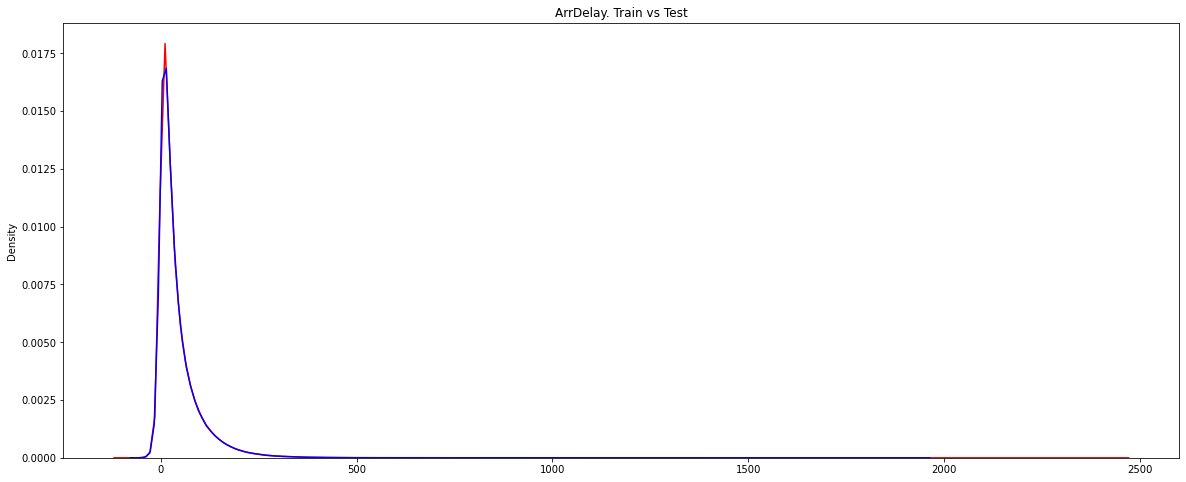

In [6]:
#ArrDelay
plt.figure(figsize=(20,8))
sns.kdeplot(x=y_train, color="red").set(title='ArrDelay. Train vs Test')
sns.kdeplot(x=y_test, color="blue")
plt.show()

El y_train i el y_test per **ArrDelay** tenen una distribució molt similar. Comprobem si tenen la mateixa mitjana amb el test d'hipòtesi.   
$H_0:$ El subset de Train i el subset de Test tenen la mateixa mitjana

In [89]:
#Test d'hipòtesi per ArrDelay
alpha=0.05
stat, p = stats.ttest_ind(y_train, y_test)
print('stat = %.3f\np-value = %.3f' % (stat,p))
if p> alpha:
    print('H0 no pot ser rebutjada, probablement la mitjana de y_train sigui igual a la de y_test')
else:
    print('H0 pot ser rebutjada, probablement la mitjana de y_train sigui no igual a la de y_test')

stat = 0.446
p-value = 0.656
H0 no pot ser rebutjada, probablement la mitjana de y_train i sigui igual a la de y_test


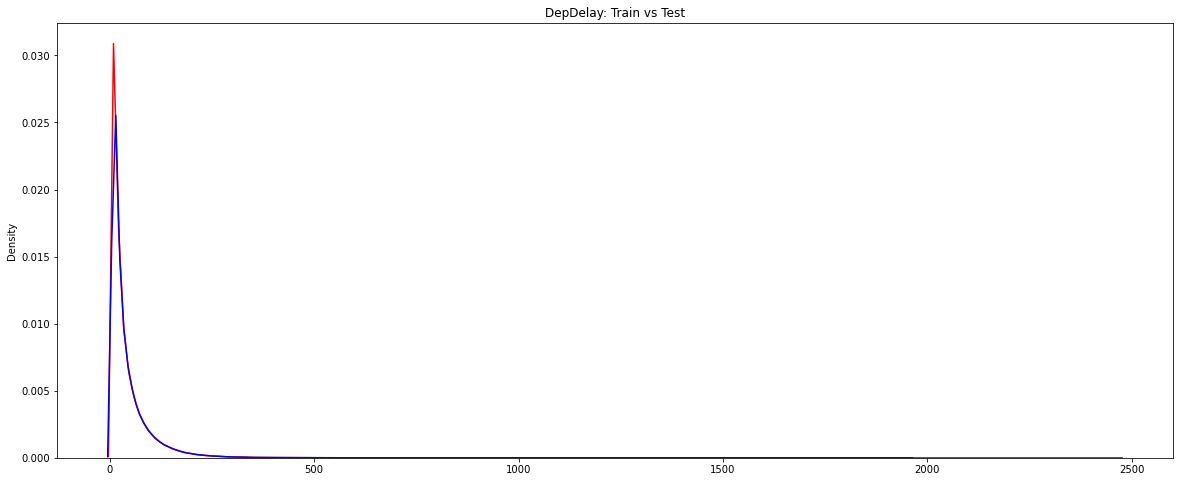

In [8]:
#Distribucions de DepDelay_train i DepDelay_test
DepDelay_train, DepDelay_test= X_train[:,14], X_test[:,14]
plt.figure(figsize=(20,8))
sns.kdeplot(x=DepDelay_train, color="red").set(title='DepDelay: Train vs Test')
sns.kdeplot(x=DepDelay_test, color="blue")
plt.show()

El y_train i el y_test per **DepDelay** tenen una distribució molt similar. Comprobem si tenen la mateixa mitjana amb el test d'hipòtesi.   
$H_0:$ El subset de Train i el subset de Test per **DepDelay** tenen la mateixa mitjana

In [9]:
#Test d'hipòtesi per DepDelay
alpha=0.05
stat, p = stats.ttest_ind(DepDelay_train, DepDelay_test)
print('stat = %.3f\np-value = %.3f' % (stat,p))
if p> alpha:
    print('H0 no pot ser rebutjada, probablement la mitjana de DepDelay_train sigui igual a la de Dep_Delay_test')
else:
    print('H0 pot ser rebutjada, probablement la mitjana de DepDelay_train no sigui igual a la de Dep_Delay_test')

stat = -0.363
p-value = 0.717
H0 no pot ser rebutjada, probablement la mitjana de DepDelay_train sigui igual a la de Dep_Delay_test


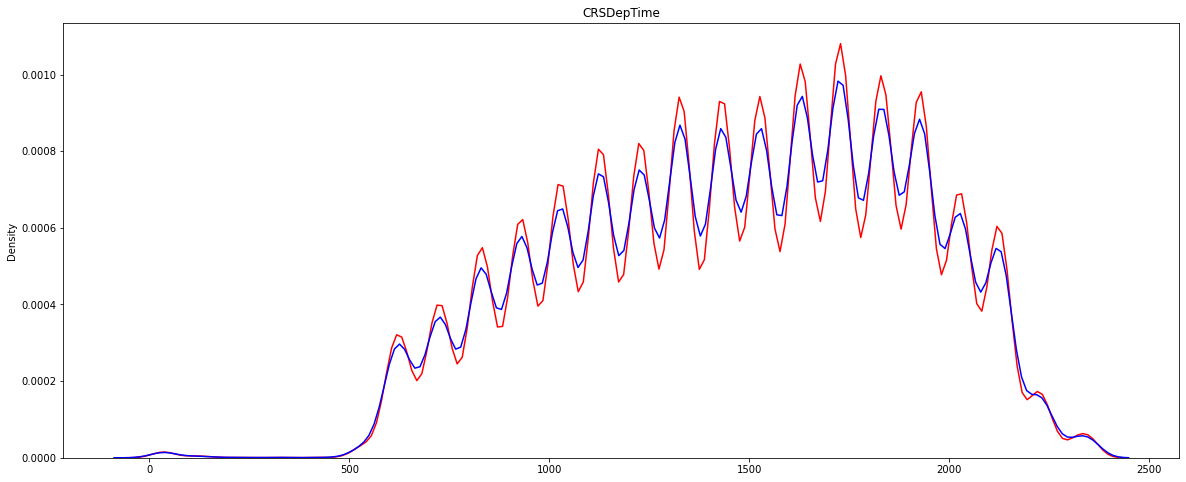

In [10]:
#Distribucions de CRSDepTime_train i CRSDepTime_test
CRSDepTime_train, CRSDepTime_test= X_train[:,5], X_test[:,5]
plt.figure(figsize=(20,8))
sns.kdeplot(x=CRSDepTime_train, color="red").set(title='CRSDepTime')
sns.kdeplot(x=CRSDepTime_test, color="blue")
plt.show()

El y_train i el y_test per **CRSDepTime** tenen una distribució molt similar. Comprobem si tenen la mateixa mitjana amb el test d'hipòtesi.   
$H_0:$ El subset de Train i el subset de Test per **CRSDepTime** tenen la mateixa mitjana

In [98]:
#Test d'hipòtesi per CRSDepTime
alpha=0.05
stat, p = stats.ttest_ind(CRSDepTime_train, CRSDepTime_test)
print('stat = %.3f\np-value = %.3f' % (stat,p))
if p> alpha:
    print('H0 no pot ser rebutjada, probablement la mitjana de CRSDepTime_train sigui igual a la de CRSDepTime_test')
else:
    print('H0 pot ser rebutjada, probablement la mitjana de CRSDepTime_train no sigui igual a la de CRSDepTime_test')

stat = -0.161
p-value = 0.872
H0 no pot ser rebutjada, probablement la mitjana de CRSDepTime_train sigui igual a la de CRSDepTime_test


Per les variables categòriques, per veure si el set de train i el test són equivalents comparem la moda

In [11]:
#Distribucions de UniqueCarrier_train i UniqueCarrier_test
UniqueCarrier_train, UniqueCarrier_test= X_train[:,8], X_test[:,8]
moda_train=stats.mode(UniqueCarrier_train)
moda_test=stats.mode(UniqueCarrier_test)
print('La moda de UniqueCarrier_train és: {0}'.format(moda_train))
print('La moda de UniqueCarrier_test és: {0}'.format(moda_test))

La moda de UniqueCarrier_train és: ModeResult(mode=array(['WN'], dtype=object), count=array([264545]))
La moda de UniqueCarrier_test és: ModeResult(mode=array(['WN'], dtype=object), count=array([113057]))


Veiem que els subsets de Train i Test per a **UniqueCarrier** tenen la mateixa moda: **WN**

**Conclusions:**       
Els subsets de train i de test semblen equivalents. Els podrem utilitzar per fer els models de regressions

## - Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

Dumifiquem les variables categòriques **UniqueCarrier i Origin** perquè pensem que són les que poden tenir més influència al model

In [18]:
airlines_dummies=pd.get_dummies(airlines, columns=['UniqueCarrier', 'Origin'])

In [19]:
airlines_dummies

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,...,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUP,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM
0,2008,1,3,4,2003.0,1955,2211.0,2225,335,N712SW,128.0,150.0,116.0,-14.0,8.0,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2008,1,3,4,754.0,735,1002.0,1000,3231,N772SW,128.0,145.0,113.0,2.0,19.0,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2008,1,3,4,628.0,620,804.0,750,448,N428WN,96.0,90.0,76.0,14.0,8.0,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008,1,3,4,1829.0,1755,1959.0,1925,3920,N464WN,90.0,90.0,77.0,34.0,34.0,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2008,1,3,4,1940.0,1915,2121.0,2110,378,N726SW,101.0,115.0,87.0,11.0,25.0,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,1621,N938DL,147.0,152.0,120.0,25.0,30.0,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7009717,2008,12,13,6,657.0,600,904.0,749,1631,N3743H,127.0,109.0,78.0,75.0,57.0,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,1631,N909DA,162.0,143.0,122.0,99.0,80.0,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,1639,N646DL,115.0,117.0,89.0,9.0,11.0,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Mirem la distribució de les variables numèriques

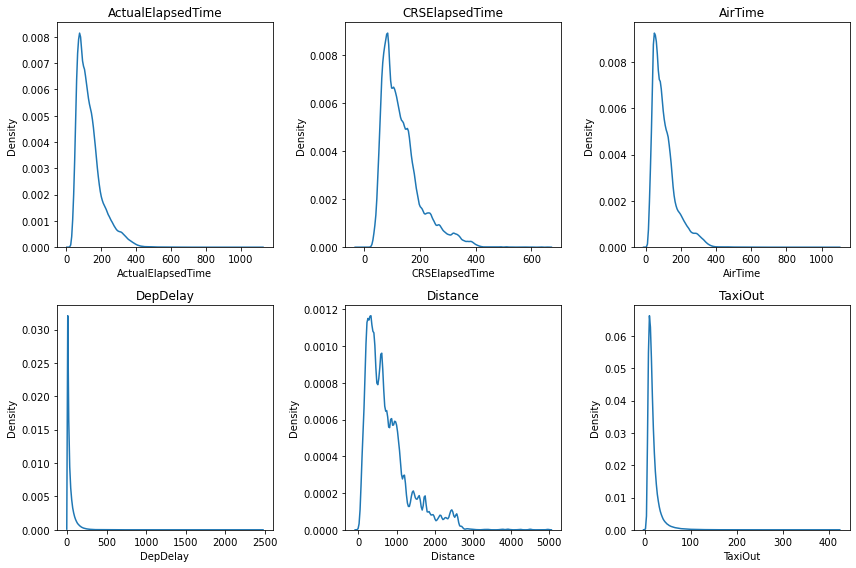

In [5]:
f, axs = plt.subplots(2, 3, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4, 4]))
sns.kdeplot(x = 'ActualElapsedTime', data=airlines, ax=axs[0][0]).set(title='ActualElapsedTime');
sns.kdeplot(x= 'CRSElapsedTime', data=airlines, ax=axs[0][1]).set(title='CRSElapsedTime');
sns.kdeplot(x='AirTime',data=airlines, ax=axs[0][2]).set(title='AirTime');
sns.kdeplot(x='DepDelay',data=airlines, ax=axs[1][0]).set(title='DepDelay');
sns.kdeplot(x='Distance',data=airlines, ax=axs[1][1]).set(title='Distance');
sns.kdeplot(x='TaxiOut',data=airlines, ax=axs[1][2]).set(title='TaxiOut');
f.tight_layout()

A la vista de les distribucions i degut a l'abundància de outliers, pensem que la transformació més adecuada per aquestes variables seria un **RobustScaler**

In [16]:
columnas= airlines.columns[[11,12,13,15,18,19,20]]
airlines_robust= RobustScaler().fit_transform(airlines[columnas])
airlines_robust = pd.DataFrame(airlines_robust, columns=columnas)
airlines_robust

,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
0,0.141176,0.409639,0.329114,-0.390244,0.309091,-0.50,-0.545455
1,0.141176,0.349398,0.291139,-0.121951,0.309091,-0.25,-0.363636
2,-0.235294,-0.313253,-0.177215,-0.390244,-0.137879,-0.75,0.272727
3,-0.305882,-0.313253,-0.164557,0.243902,-0.137879,-0.75,-0.363636
4,-0.176471,-0.012048,-0.037975,0.024390,0.124242,-0.50,-0.363636
...,...,...,...,...,...,...,...
1936753,0.364706,0.433735,0.379747,0.146341,0.454545,0.75,0.363636
1936754,0.129412,-0.084337,-0.151899,0.804878,-0.189394,2.25,1.818182
1936755,0.541176,0.325301,0.405063,1.365854,0.125758,0.50,1.636364
1936756,-0.011765,0.012048,-0.012658,-0.317073,-0.110606,1.75,-0.090909


Ara concatenem el df de dummies i el df de les variables escalades

In [20]:
airlines_dummies.drop(columnas, axis=1, inplace=True)
airlines_dummies.reset_index(drop=True, inplace=True)
airlines_t= pd.concat([airlines_dummies, airlines_robust], axis=1)
airlines_t

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,ArrDelay,Dest,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,...,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUP,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
0,2008,1,3,4,2003.0,1955,2211.0,2225,335,N712SW,-14.0,TPA,0,N,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.141176,0.409639,0.329114,-0.390244,0.309091,-0.50,-0.545455
1,2008,1,3,4,754.0,735,1002.0,1000,3231,N772SW,2.0,TPA,0,N,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.141176,0.349398,0.291139,-0.121951,0.309091,-0.25,-0.363636
2,2008,1,3,4,628.0,620,804.0,750,448,N428WN,14.0,BWI,0,N,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.235294,-0.313253,-0.177215,-0.390244,-0.137879,-0.75,0.272727
3,2008,1,3,4,1829.0,1755,1959.0,1925,3920,N464WN,34.0,BWI,0,N,0,2.0,0.0,0.0,0.0,32.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.305882,-0.313253,-0.164557,0.243902,-0.137879,-0.75,-0.363636
4,2008,1,3,4,1940.0,1915,2121.0,2110,378,N726SW,11.0,JAX,0,N,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.176471,-0.012048,-0.037975,0.024390,0.124242,-0.50,-0.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,1621,N938DL,25.0,ATL,0,N,0,3.0,0.0,0.0,0.0,22.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.364706,0.433735,0.379747,0.146341,0.454545,0.75,0.363636
1936754,2008,12,13,6,657.0,600,904.0,749,1631,N3743H,75.0,ATL,0,N,0,0.0,57.0,18.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.129412,-0.084337,-0.151899,0.804878,-0.189394,2.25,1.818182
1936755,2008,12,13,6,1007.0,847,1149.0,1010,1631,N909DA,99.0,IAH,0,N,0,1.0,0.0,19.0,0.0,79.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.541176,0.325301,0.405063,1.365854,0.125758,0.50,1.636364

Farem una **transformació polinòmica** (de grau 2) de les variables numèriques ja escalades

In [27]:
airlines_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(airlines_robust)

In [28]:
airlines_poly

array([[ 0.14117647,  0.40963855,  0.32911392, ...,  0.25      ,
         0.27272727,  0.29752066],
       [ 0.14117647,  0.34939759,  0.29113924, ...,  0.0625    ,
         0.09090909,  0.1322314 ],
       [-0.23529412, -0.31325301, -0.17721519, ...,  0.5625    ,
        -0.20454545,  0.07438017],
       ...,
       [ 0.54117647,  0.3253012 ,  0.40506329, ...,  0.25      ,
         0.81818182,  2.67768595],
       [-0.01176471,  0.01204819, -0.01265823, ...,  3.0625    ,
        -0.15909091,  0.00826446],
       [ 0.08235294,  0.22891566,  0.17721519, ...,  0.25      ,
        -0.13636364,  0.07438017]])

## - Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

Resumeixo les variables numèriques resultant de fer el RobusScaler

In [21]:
airlines_robust.describe()

,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
count,1.928371e+06,1.936560e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06
mean,2.035984e-01,2.205150e-01,2.313563e-01,4.679311e-01,2.419487e-01,2.032438e-01,3.847457e-01
std,8.477655e-01,8.595354e-01,8.688938e-01,1.302500e+00,8.704237e-01,1.318399e+00,1.303503e+00
min,-1.200000e+00,-1.698795e+00,-1.139241e+00,-4.390244e-01,-9.015152e-01,-1.500000e+00,-1.272727e+00
25%,-4.235294e-01,-4.096386e-01,-4.050633e-01,-2.926829e-01,-4.060606e-01,-5.000000e-01,-3.636364e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.764706e-01,5.903614e-01,5.949367e-01,7.073171e-01,5.939394e-01,5.000000e-01,6.363636e-01
max,1.174118e+01,6.554217e+00,1.267089e+01,5.958537e+01,6.600000e+00,5.850000e+01,3.709091e+01


Com a conseqüència del RobustScaler totes les variables tenen la moda = 0, la mitjana esà pròxima a moda i els valors máxims ja no són tant grans

Veiem la distribució de les variables abans i després de fer el RobustScaler i també els outliers amb un boxplot

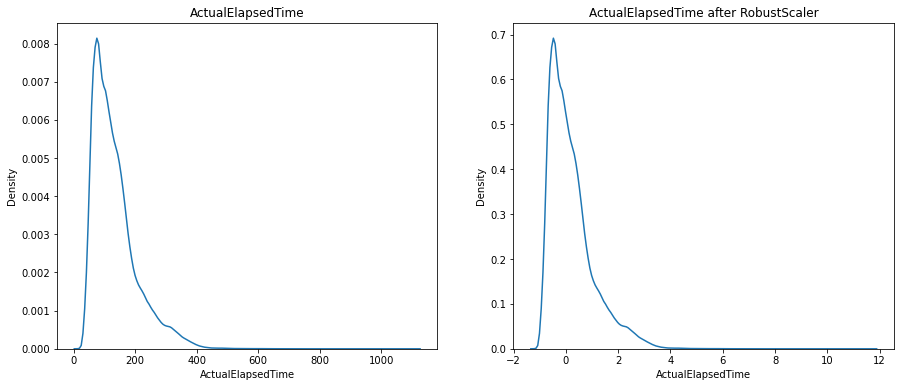

In [41]:
#ActualElapsedTime
f, axs = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw=dict(width_ratios=[5, 5]))
sns.kdeplot(x = 'ActualElapsedTime', data=airlines, ax=axs[0]).set(title='ActualElapsedTime');
sns.kdeplot(x = 'ActualElapsedTime', data=airlines_robust, ax=axs[1]).set(title='ActualElapsedTime after RobustScaler');

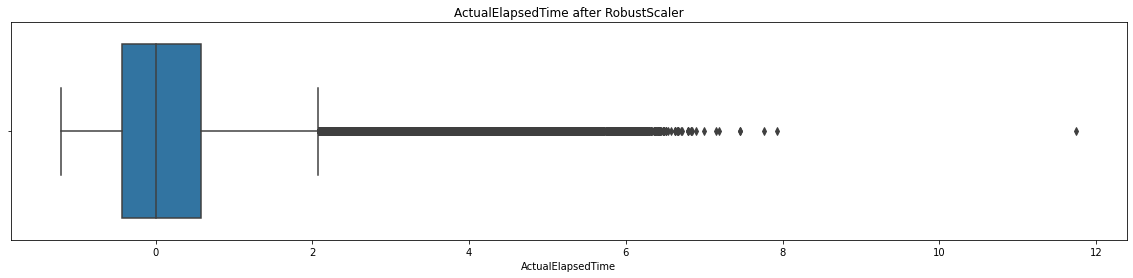

In [48]:
plt.figure(figsize=(20,4))
sns.boxplot(x = 'ActualElapsedTime', data=airlines_robust).set(title='ActualElapsedTime after RobustScaler');

Veiem que la distribució de ActualElapsedTime transformat té una forma similar a la distribució sense transoformar però la moda és 0, la mitjana 0,20 i els valors estan més concentrats (la inmensa majoria són inferiors a 8)

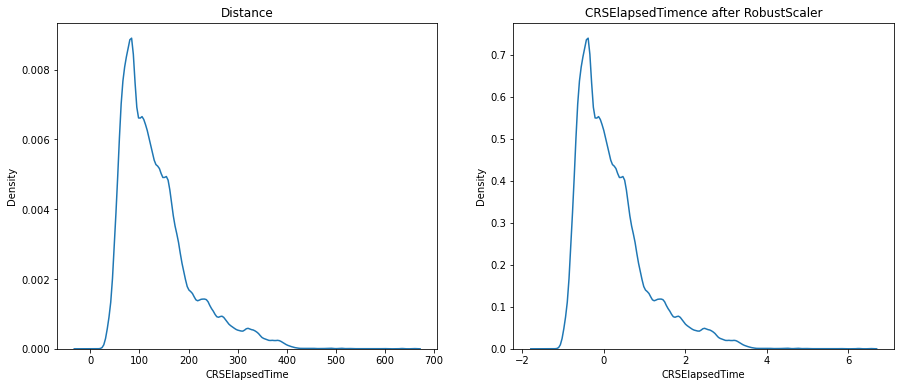

In [14]:
#CRSElapsedTime
f, axs = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw=dict(width_ratios=[5, 5]))
sns.kdeplot(x = 'CRSElapsedTime', data=airlines, ax=axs[0]).set(title='Distance');
sns.kdeplot(x = 'CRSElapsedTime', data=airlines_robust, ax=axs[1]).set(title='CRSElapsedTimence after RobustScaler');

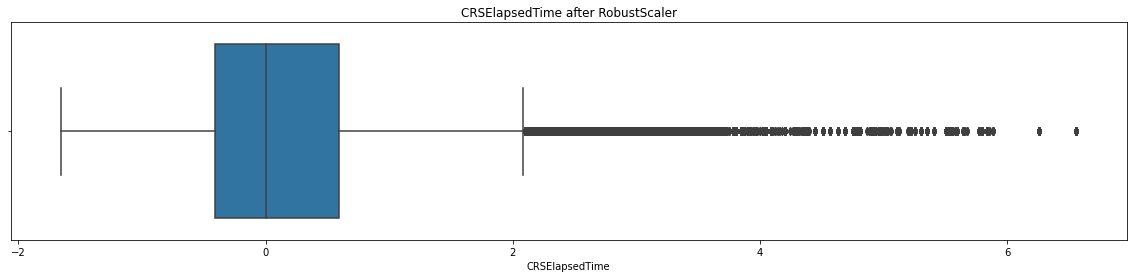

In [51]:
plt.figure(figsize=(20,4))
sns.boxplot(x = 'CRSElapsedTime', data=airlines_robust).set(title='CRSElapsedTime after RobustScaler');

Veiem que la distribució de ActualElapsedTime transformat té una forma similar a la distribució sense transoformar però la moda és 0, la mitjana 0,22 i els valors estan més concentrats (la inmensa majoria són inferiors a 6)

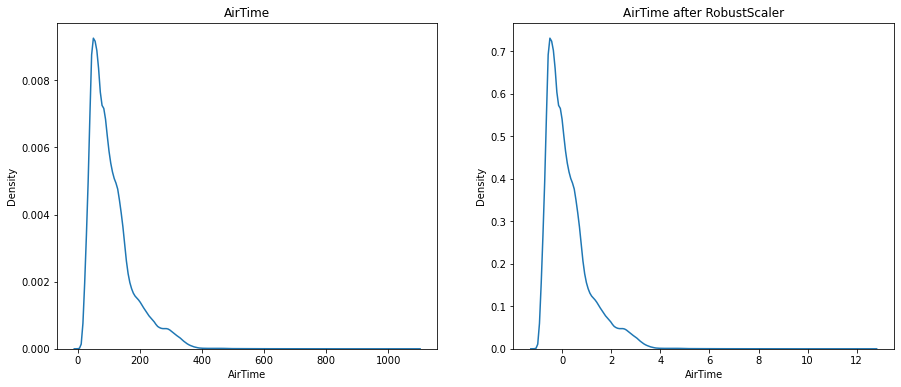

In [8]:
#AirTime
f, axs = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw=dict(width_ratios=[5, 5]))
sns.kdeplot(x = 'AirTime', data=airlines, ax=axs[0]).set(title='AirTime');
sns.kdeplot(x = 'AirTime', data=airlines_robust, ax=axs[1]).set(title='AirTime after RobustScaler');

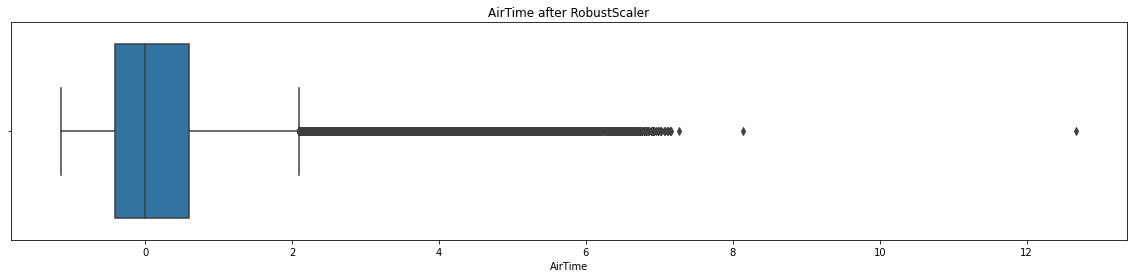

In [9]:
plt.figure(figsize=(20,4))
sns.boxplot(x = 'AirTime', data=airlines_robust).set(title='AirTime after RobustScaler');

Veiem que la distribució de AirTime transformat té una forma similar a la distribució sense transoformar però la moda és 0, la mitjana 0,23 i els valors estan més concentrats (la inmensa majoria són inferiors a 8)

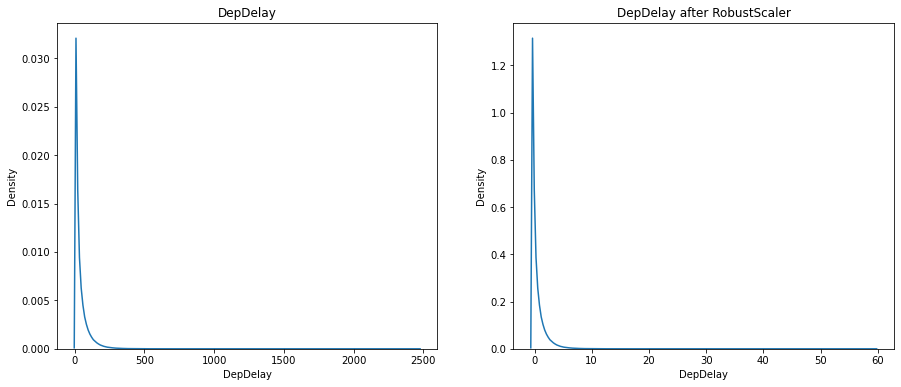

In [11]:
#DepDelay
f, axs = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw=dict(width_ratios=[5, 5]))
sns.kdeplot(x = 'DepDelay', data=airlines, ax=axs[0]).set(title='DepDelay');
sns.kdeplot(x = 'DepDelay', data=airlines_robust, ax=axs[1]).set(title='DepDelay after RobustScaler');

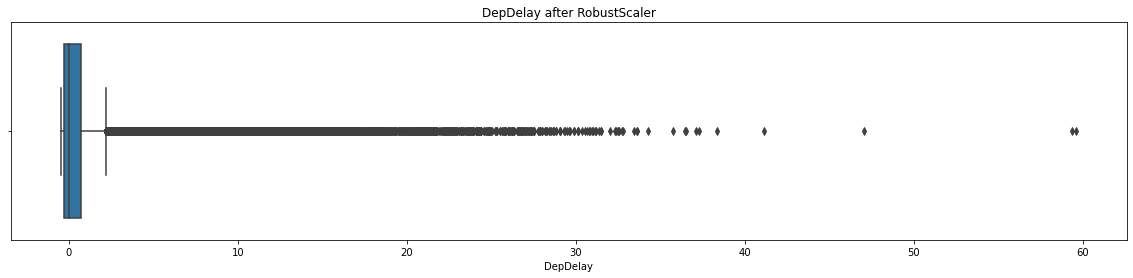

In [12]:
plt.figure(figsize=(20,4))
sns.boxplot(x = 'DepDelay', data=airlines_robust).set(title='DepDelay after RobustScaler');

Veiem que la distribució de AirTime transformat té una forma similar a la distribució sense transoformar però la moda és 0, la mitjana 0,24 i els valors estan més concentrats (la inmensa majoria són inferiors a 40). És una distribució amb molts outliers.

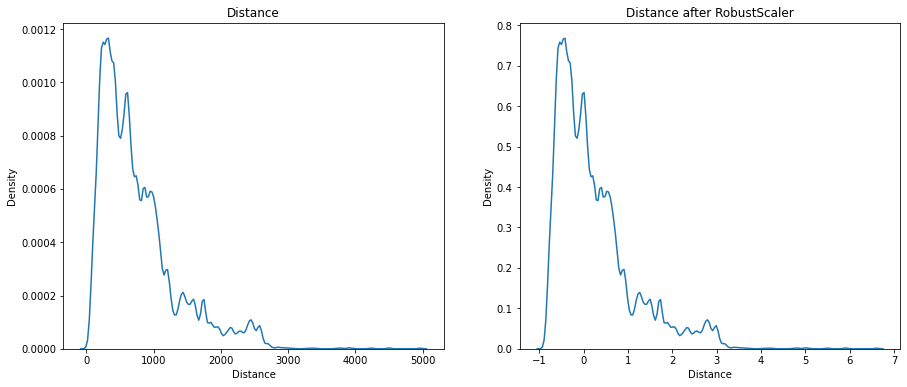

In [15]:
#Distance
f, axs = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw=dict(width_ratios=[5, 5]))
sns.kdeplot(x = 'Distance', data=airlines, ax=axs[0]).set(title='Distance');
sns.kdeplot(x = 'Distance', data=airlines_robust, ax=axs[1]).set(title='Distance after RobustScaler');

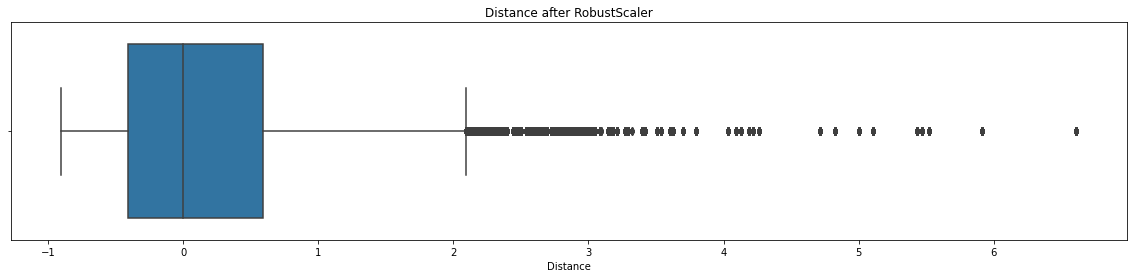

In [16]:
plt.figure(figsize=(20,4))
sns.boxplot(x = 'Distance', data=airlines_robust).set(title='Distance after RobustScaler');

In [ ]:
Veiem que la distribució de AirTime transformat té una forma similar a la distribució sense transoformar però la moda és 0, la mitjana 0,24 i els valors estan més concentrats (la inmensa majoria són inferiors a 40). És una distribució amb molts outliers.
